In [5]:
from pathlib import Path

import collections
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import operator
%matplotlib inline

# Describing a Network 

1.	Produce a network plot for this network

In [6]:
G1=nx.Graph()
G1.add_edge('A','B')
G1.add_edge('A','C')
G1.add_edge('B','C')
G1.add_edge('C','D')
G1.add_edge('D','E')

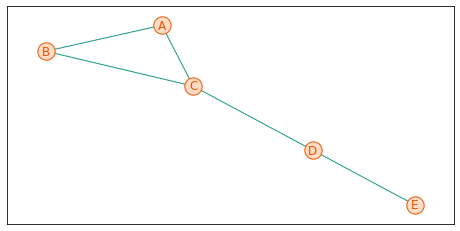

In [7]:
plt.figure(figsize=(8,4))
nx.draw_networkx(G1, font_color="#EB5600", edgecolors="#EB5600", node_color= "#FFDCC8", edge_color="#1A9988")
plt.show()

5.	Tabulate the degree distribution for this network. 

In [8]:
# Calculate degrees for each node
degrees = [deg for node, deg in G1.degree()]
print(degrees)

[2, 2, 3, 2, 1]


In [9]:
# Count the frequency of each degree 
degree_counts = {}
for degree in degrees:
    if degree not in degree_counts:
        degree_counts[degree] = 0
    degree_counts[degree] += 1

In [10]:
# Tabulate the degree distribution
degree_distribution = {}
for degree, count in degree_counts.items():
    degree_distribution[degree] = count / len(G1.nodes())

# Print the degree distribution
for degree, freq in degree_distribution.items():
    print(f'Degree {degree}: {freq}')

Degree 2: 0.6
Degree 3: 0.2
Degree 1: 0.2


7.	Calculate the betweenness centrality for nodes A and C. 

In [11]:
betweenness_centrality = nx.betweenness_centrality(G1)

print(f"Betweenness centrality for node A: {betweenness_centrality['A']:}")
print(f"Betweenness centrality for node C: {betweenness_centrality['C']:.4f}")

Betweenness centrality for node A: 0.0
Betweenness centrality for node C: 0.6667


In [12]:
# Betweenness centrality is a measure of the importance of a node within a network. It quantifies the extent to which a node acts as a bridge along the shortest paths between other nodes in the network. In other words, it measures how often a node appears on the shortest paths between pairs of nodes in the network. 

8.	Calculate the density of the network. (1%)

In [13]:
nx.density(G1)

0.5

# Network Density and Size 

5.	Tabulate the degree distribution for this network.

In [14]:
G1=nx.Graph()
G1.add_edge('A','B')
G1.add_edge('A','C')
G1.add_edge('B','C')
G1.add_edge('C','D')
G1.add_edge('D','E')
G1.add_edge('A','F')
G1.add_edge('B','F')
G1.add_edge('A','G')
G1.add_edge('B','G')

In [15]:
degrees = [deg for node, deg in G1.degree()]
print(degrees)

[4, 4, 3, 2, 1, 2, 2]


In [16]:
degreeCount = collections.Counter(d for node, d in G1.degree())
for degree, freq in degreeCount.items():
     print(f'Degree {degree}: {freq}')

Degree 4: 2
Degree 3: 1
Degree 2: 3
Degree 1: 1


# Network characteristics 

1.	Create the network

In [17]:
CMDF = pd.read_csv('classmates.csv', header=None)
CMChar = pd.read_csv('classmatesChar.csv')

In [18]:
CMDF.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0
3,0,0,1,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
CMChar.head()

,Name,Gender,Attendance
0,Alex,1,12
1,Ben,0,6
2,Chloe,1,11
3,David,0,13
4,Emma,1,9


In [20]:
CM = CMDF.to_numpy()
CM

array([[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
      

In [21]:
G=nx.Graph(CM)

In [22]:
Gender= CMChar["Gender"].to_dict()
Attendance = CMChar["Attendance"].to_dict()
Name = CMChar["Name"].to_dict()
print(Attendance)
print(Gender)
print(Name)


{0: 12, 1: 6, 2: 11, 3: 13, 4: 9, 5: 11, 6: 12, 7: 8, 8: 13, 9: 8, 10: 12, 11: 7, 12: 7, 13: 13, 14: 10, 15: 11, 16: 11, 17: 9, 18: 8, 19: 10, 20: 7, 21: 10, 22: 11, 23: 12, 24: 9}
{0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0, 10: 0, 11: 1, 12: 0, 13: 1, 14: 0, 15: 1, 16: 0, 17: 1, 18: 1, 19: 1, 20: 1, 21: 0, 22: 0, 23: 0, 24: 1}
{0: 'Alex', 1: 'Ben', 2: 'Chloe', 3: 'David', 4: 'Emma', 5: 'Frank', 6: 'Grace', 7: 'Hank', 8: 'Ivy', 9: 'Jim', 10: 'Kyle', 11: 'Leah', 12: 'Mike', 13: 'Nora', 14: 'Owen', 15: 'Pat', 16: 'Quinn', 17: 'Riley', 18: 'Stella', 19: 'Tessa', 20: 'Ursula', 21: 'Victor', 22: 'Ward', 23: 'Yves', 24: 'Zelda'}


In [23]:
nx.set_node_attributes(G, Gender , name="Gender")
nx.set_node_attributes(G, Attendance , name="Attendance")

In [24]:
G.nodes(data=True)

NodeDataView({0: {'Gender': 1, 'Attendance': 12}, 1: {'Gender': 0, 'Attendance': 6}, 2: {'Gender': 1, 'Attendance': 11}, 3: {'Gender': 0, 'Attendance': 13}, 4: {'Gender': 1, 'Attendance': 9}, 5: {'Gender': 0, 'Attendance': 11}, 6: {'Gender': 1, 'Attendance': 12}, 7: {'Gender': 0, 'Attendance': 8}, 8: {'Gender': 1, 'Attendance': 13}, 9: {'Gender': 0, 'Attendance': 8}, 10: {'Gender': 0, 'Attendance': 12}, 11: {'Gender': 1, 'Attendance': 7}, 12: {'Gender': 0, 'Attendance': 7}, 13: {'Gender': 1, 'Attendance': 13}, 14: {'Gender': 0, 'Attendance': 10}, 15: {'Gender': 1, 'Attendance': 11}, 16: {'Gender': 0, 'Attendance': 11}, 17: {'Gender': 1, 'Attendance': 9}, 18: {'Gender': 1, 'Attendance': 8}, 19: {'Gender': 1, 'Attendance': 10}, 20: {'Gender': 1, 'Attendance': 7}, 21: {'Gender': 0, 'Attendance': 10}, 22: {'Gender': 0, 'Attendance': 11}, 23: {'Gender': 0, 'Attendance': 12}, 24: {'Gender': 1, 'Attendance': 9}})

In [25]:
G=nx.relabel_nodes(G,Name)
G.nodes(data=True)

NodeDataView({'Alex': {'Gender': 1, 'Attendance': 12}, 'Ben': {'Gender': 0, 'Attendance': 6}, 'Chloe': {'Gender': 1, 'Attendance': 11}, 'David': {'Gender': 0, 'Attendance': 13}, 'Emma': {'Gender': 1, 'Attendance': 9}, 'Frank': {'Gender': 0, 'Attendance': 11}, 'Grace': {'Gender': 1, 'Attendance': 12}, 'Hank': {'Gender': 0, 'Attendance': 8}, 'Ivy': {'Gender': 1, 'Attendance': 13}, 'Jim': {'Gender': 0, 'Attendance': 8}, 'Kyle': {'Gender': 0, 'Attendance': 12}, 'Leah': {'Gender': 1, 'Attendance': 7}, 'Mike': {'Gender': 0, 'Attendance': 7}, 'Nora': {'Gender': 1, 'Attendance': 13}, 'Owen': {'Gender': 0, 'Attendance': 10}, 'Pat': {'Gender': 1, 'Attendance': 11}, 'Quinn': {'Gender': 0, 'Attendance': 11}, 'Riley': {'Gender': 1, 'Attendance': 9}, 'Stella': {'Gender': 1, 'Attendance': 8}, 'Tessa': {'Gender': 1, 'Attendance': 10}, 'Ursula': {'Gender': 1, 'Attendance': 7}, 'Victor': {'Gender': 0, 'Attendance': 10}, 'Ward': {'Gender': 0, 'Attendance': 11}, 'Yves': {'Gender': 0, 'Attendance': 12}, 'Z

In [26]:
node_colors = []

for node, data in G.nodes(data=True):
    if data['Gender'] == 0 :
        node_colors.append('blue')
    else:
        node_colors.append('red')

node_sizes = [data['Attendance'] * 200 for node, data in G.nodes(data=True)]

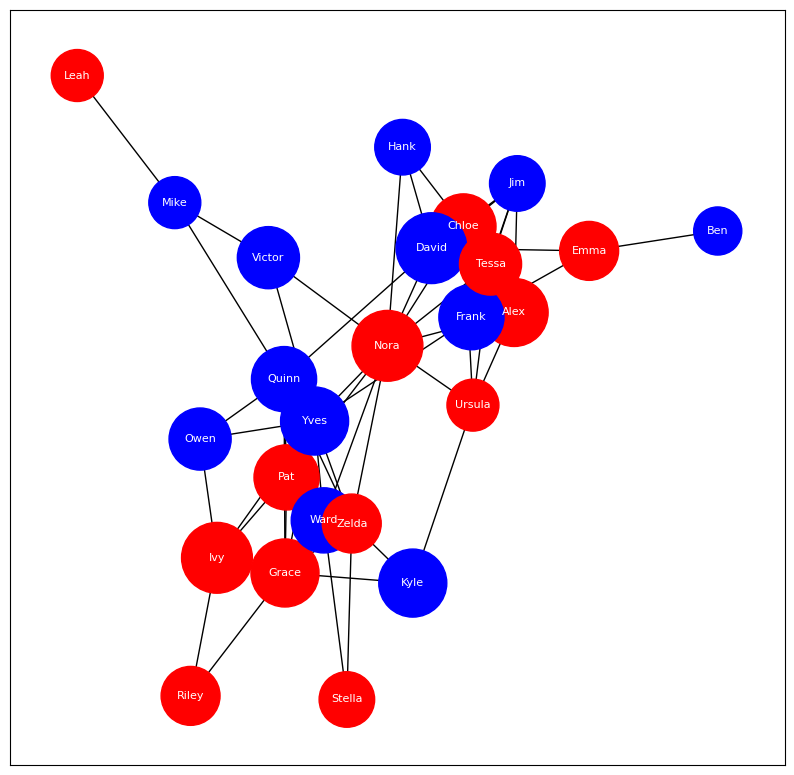

In [27]:
plt.figure(figsize=(10,10), dpi=100)

nx.draw_networkx(G, with_labels=True, node_color=node_colors, node_size=node_sizes, font_color='white', font_size = 8)
plt.show()

2.	What is the density of the network? 

In [28]:
nx.density(G)

0.22

3.	What is the transitivity of the network

In [29]:
nx.transitivity(G)

0.4946808510638298

4.	Who are the top five most and the bottom five least popular people in the class? 

In [30]:
degree_centrality = nx.degree_centrality(G)

# Sort the degree centrality in descending order to find the top five most popular people
most_popular = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Sort the degree centrality in ascending order to find the bottom five least popular people
least_popular = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=False)[:5]

print("Top 5 most popular people:", [x[0] for x in most_popular])
print("Bottom 5 least popular people:", [x[0] for x in least_popular])

Top 5 most popular people: ['Nora', 'Yves', 'Chloe', 'Grace', 'Quinn']
Bottom 5 least popular people: ['Ben', 'Leah', 'Riley', 'Stella', 'Emma']


5.	Who are the top five people that could introduce students to one another? 

In [31]:
GBCNode = nx.betweenness_centrality(G, normalized = True, endpoints = False)
sorted(GBCNode.items(), key=operator.itemgetter(1), reverse = True)[:5]

[('Nora', 0.23378531693749083),
 ('Yves', 0.17904066545370897),
 ('Quinn', 0.17883650166258858),
 ('David', 0.14497798899972814),
 ('Frank', 0.09889422172030869)]

6.	Ben wants to ask Riley out. However, he wants to know her better first. Who are the people that can introduce Ben to Riley? With what sequences? 

In [33]:
# Find the shortest path between Ben and Riley
shortest_path = nx.shortest_path(G, source='Ben', target='Riley')
print(shortest_path)

['Ben', 'Emma', 'David', 'Quinn', 'Grace', 'Riley']


8.	What is the maximum number of people between two students that are not friends? 

In [34]:
# Initialize the longest path and its length
longest_path = []
longest_path_length = 0

# Iterate over all pairs of nodes in the graph
for source in G.nodes():
    for target in G.nodes():
        if source != target:
            try:
                # Find the shortest path between the two nodes
                path = nx.shortest_path(G, source=source, target=target)

                # If the path is longer than the current longest path, update the longest path and its length
                if len(path) > longest_path_length:
                    longest_path = path
                    longest_path_length = len(path)
            except nx.NetworkXNoPath:
                pass  # No path exists between the two nodes, so we skip this pair

# Print the longest path and its length
print(f"The longest path is: {' -> '.join(longest_path)}")
print(f"The maximum number of people between two students: {longest_path_length - 2}")

The longest path is: Ben -> Emma -> David -> Quinn -> Grace -> Kyle
The maximum number of people between two students: 4


9.	Who are the people who hang out the most? 

In [35]:
GBCEdge = nx.edge_betweenness_centrality(G, normalized=True)
sorted(GBCEdge.items(), key=operator.itemgetter(1), reverse = True)

[(('David', 'Quinn'), 0.11723328523328522),
 (('Frank', 'Yves'), 0.11466450216450215),
 (('Mike', 'Quinn'), 0.11033333333333334),
 (('David', 'Emma'), 0.08780303030303033),
 (('Ben', 'Emma'), 0.08),
 (('Leah', 'Mike'), 0.08),
 (('Nora', 'Victor'), 0.06766666666666667),
 (('Emma', 'Frank'), 0.0671969696969697),
 (('Grace', 'Riley'), 0.05815873015873016),
 (('Nora', 'Zelda'), 0.0507012987012987),
 (('Ivy', 'Yves'), 0.05049470899470899),
 (('Grace', 'Quinn'), 0.0487938912938913),
 (('Nora', 'Ward'), 0.0475952380952381),
 (('Nora', 'Yves'), 0.046608465608465606),
 (('Mike', 'Victor'), 0.04633333333333334),
 (('Alex', 'Nora'), 0.045574074074074086),
 (('David', 'Nora'), 0.0455084175084175),
 (('Nora', 'Pat'), 0.044664021164021156),
 (('Hank', 'Nora'), 0.043857142857142865),
 (('Nora', 'Ursula'), 0.04329124579124579),
 (('Kyle', 'Ursula'), 0.042533189033189034),
 (('Stella', 'Zelda'), 0.042222222222222223),
 (('Victor', 'Yves'), 0.042),
 (('Owen', 'Yves'), 0.03966666666666666),
 (('Nora', 'T

10.	Which members are usually excluded from gatherings

In [36]:
nx.degree_centrality(G)

{'Alex': 0.25,
 'Ben': 0.041666666666666664,
 'Chloe': 0.3333333333333333,
 'David': 0.29166666666666663,
 'Emma': 0.125,
 'Frank': 0.25,
 'Grace': 0.3333333333333333,
 'Hank': 0.125,
 'Ivy': 0.20833333333333331,
 'Jim': 0.20833333333333331,
 'Kyle': 0.125,
 'Leah': 0.041666666666666664,
 'Mike': 0.125,
 'Nora': 0.4583333333333333,
 'Owen': 0.125,
 'Pat': 0.29166666666666663,
 'Quinn': 0.3333333333333333,
 'Riley': 0.08333333333333333,
 'Stella': 0.08333333333333333,
 'Tessa': 0.29166666666666663,
 'Ursula': 0.20833333333333331,
 'Victor': 0.125,
 'Ward': 0.29166666666666663,
 'Yves': 0.41666666666666663,
 'Zelda': 0.3333333333333333}

In [37]:
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1])
print(sorted_degree_centrality)

[('Ben', 0.041666666666666664), ('Leah', 0.041666666666666664), ('Riley', 0.08333333333333333), ('Stella', 0.08333333333333333), ('Emma', 0.125), ('Hank', 0.125), ('Kyle', 0.125), ('Mike', 0.125), ('Owen', 0.125), ('Victor', 0.125), ('Ivy', 0.20833333333333331), ('Jim', 0.20833333333333331), ('Ursula', 0.20833333333333331), ('Alex', 0.25), ('Frank', 0.25), ('David', 0.29166666666666663), ('Pat', 0.29166666666666663), ('Tessa', 0.29166666666666663), ('Ward', 0.29166666666666663), ('Chloe', 0.3333333333333333), ('Grace', 0.3333333333333333), ('Quinn', 0.3333333333333333), ('Zelda', 0.3333333333333333), ('Yves', 0.41666666666666663), ('Nora', 0.4583333333333333)]


# Network Analysis 

1.	Add the following columns to the data frame you created from classmatesChar.csv.

In [38]:
closeness_centrality = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)


CMChar['Closeness Centrality'] = CMChar['Name'].map(closeness_centrality)
CMChar['Degree Centrality'] = CMChar['Name'].map(degree_centrality)
CMChar['Betweenness Centrality'] = CMChar['Name'].map(betweenness_centrality)
CMChar['Eigenvector Centrality'] = CMChar['Name'].map(eigenvector_centrality)


print(CMChar)

      Name  Gender  Attendance  Closeness Centrality  Degree Centrality  \
0     Alex       1          12              0.452830           0.250000   
1      Ben       0           6              0.282353           0.041667   
2    Chloe       1          11              0.480000           0.333333   
3    David       0          13              0.521739           0.291667   
4     Emma       1           9              0.387097           0.125000   
5    Frank       0          11              0.500000           0.250000   
6    Grace       1          12              0.489796           0.333333   
7     Hank       0           8              0.428571           0.125000   
8      Ivy       1          13              0.421053           0.208333   
9      Jim       0           8              0.406780           0.208333   
10    Kyle       0          12              0.406780           0.125000   
11    Leah       1           7              0.292683           0.041667   
12    Mike       0       

2.	 Using linear regression, argue what the relationship between students’ characteristics and different centrality measures is. Is there any statistically significant relationship? 

In [67]:
predictors = ['Attendance','Gender']
outcome1 = 'Closeness Centrality'
outcome2 = 'Degree Centrality'
outcome3 = 'Betweenness Centrality'
outcome4 = 'Eigenvector Centrality'

In [68]:
pd.get_dummies(CMChar[predictors], drop_first=True).head()

,Attendance,Gender
0,12,1
1,6,0
2,11,1
3,13,0
4,9,1


In [73]:
#build the first linear regression between students’ characteristics and Closeness Centrality
X = pd.get_dummies(CMChar[predictors], drop_first=True)
y = CMChar[outcome1]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
CMCharLM = LinearRegression()
CMCharLM.fit(X, y)
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop')
results = model.fit()
print(results.summary2())

                   Results: Ordinary least squares
Model:              OLS                  Adj. R-squared:     0.434    
Dependent Variable: Closeness Centrality AIC:                -64.3724 
Date:               2023-04-10 20:44     BIC:                -60.7158 
No. Observations:   25                   Log-Likelihood:     35.186   
Df Model:           2                    F-statistic:        10.19    
Df Residuals:       22                   Prob (F-statistic): 0.000736 
R-squared:          0.481                Scale:              0.0039861
------------------------------------------------------------------------
                 Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
------------------------------------------------------------------------
const            0.1869     0.0635    2.9414   0.0076    0.0551   0.3186
Attendance       0.0275     0.0061    4.4819   0.0002    0.0148   0.0402
Gender          -0.0183     0.0253   -0.7231   0.4772   -0.0707   0.0342
--------------

In [76]:
#build the second linear regression between students’ characteristics and Degree Centrality
X = pd.get_dummies(CMChar[predictors], drop_first=True)
y = CMChar[outcome2]
CMCharLM = LinearRegression()
CMCharLM.fit(X, y)
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop')
results = model.fit()
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS               Adj. R-squared:     0.417    
Dependent Variable: Degree Centrality AIC:                -47.3052 
Date:               2023-04-10 20:48  BIC:                -43.6486 
No. Observations:   25                Log-Likelihood:     26.653   
Df Model:           2                 F-statistic:        9.580    
Df Residuals:       22                Prob (F-statistic): 0.00102  
R-squared:          0.466             Scale:              0.0078893
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const        -0.1633     0.0894   -1.8270   0.0813   -0.3486   0.0221
Attendance    0.0371     0.0086    4.3000   0.0003    0.0192   0.0550
Gender        0.0232     0.0356    0.6510   0.5218   -0.0506   0.0970
------------------------------------------------------

In [77]:
#build the third linear regression between students’ characteristics and Betweenness Centrality
X = pd.get_dummies(CMChar[predictors], drop_first=True)
y = CMChar[outcome3]
CMCharLM = LinearRegression()
CMCharLM.fit(X, y)
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop')
results = model.fit()
print(results.summary2())

                    Results: Ordinary least squares
Model:              OLS                    Adj. R-squared:     0.210    
Dependent Variable: Betweenness Centrality AIC:                -67.9969 
Date:               2023-04-10 20:48       BIC:                -64.3402 
No. Observations:   25                     Log-Likelihood:     36.998   
Df Model:           2                      F-statistic:        4.199    
Df Residuals:       22                     Prob (F-statistic): 0.0285   
R-squared:          0.276                  Scale:              0.0034481
---------------------------------------------------------------------------
               Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------------
const         -0.0915      0.0591    -1.5485    0.1358    -0.2140    0.0310
Attendance     0.0159      0.0057     2.7838    0.0108     0.0041    0.0277
Gender        -0.0215      0.0235    -0.9129    0.3712   

In [78]:
#build the fourth linear regression between students’ characteristics and Eigenvector Centrality 
X = pd.get_dummies(CMChar[predictors], drop_first=True)
y = CMChar[outcome4]
CMCharLM = LinearRegression()
CMCharLM.fit(X, y)
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop')
results = model.fit()
print(results.summary2())

                    Results: Ordinary least squares
Model:              OLS                    Adj. R-squared:     0.400    
Dependent Variable: Eigenvector Centrality AIC:                -53.4517 
Date:               2023-04-10 20:48       BIC:                -49.7950 
No. Observations:   25                     Log-Likelihood:     29.726   
Df Model:           2                      F-statistic:        8.991    
Df Residuals:       22                     Prob (F-statistic): 0.00140  
R-squared:          0.450                  Scale:              0.0061697
---------------------------------------------------------------------------
               Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------------
const         -0.1545      0.0790    -1.9544    0.0635    -0.3184    0.0094
Attendance     0.0319      0.0076     4.1842    0.0004     0.0161    0.0478
Gender         0.0165      0.0315     0.5253    0.6046   